**Regresión básica / Ejercicio de Regresión 1 (Core)**

In [ ]:
# 1. Cargar datos

import pandas as pd

df = pd.read_csv('house-prices.csv')

In [ ]:
# 2. Exploración de datos:

import pandas as pd

print("Primeras 5 filas del DataFrame:")
print(df.head())  # Muestra las primeras 5 filas

Primeras 5 filas del DataFrame:
   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East


In [ ]:
print(df.info())  # Muestra información sobre el DataFrame (tipos de datos, valores no nulos, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None


In [ ]:
print(df.describe().to_string(index=False))  # Estadísticas descriptivas de las columnas numéricas

      Home         Price        SqFt   Bedrooms  Bathrooms     Offers
128.000000    128.000000  128.000000 128.000000 128.000000 128.000000
 64.500000 130427.343750 2000.937500   3.023438   2.445312   2.578125
 37.094474  26868.770371  211.572431   0.725951   0.514492   1.069324
  1.000000  69100.000000 1450.000000   2.000000   2.000000   1.000000
 32.750000 111325.000000 1880.000000   3.000000   2.000000   2.000000
 64.500000 125950.000000 2000.000000   3.000000   2.000000   3.000000
 96.250000 148250.000000 2140.000000   3.000000   3.000000   3.000000
128.000000 211200.000000 2590.000000   5.000000   4.000000   6.000000


In [ ]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


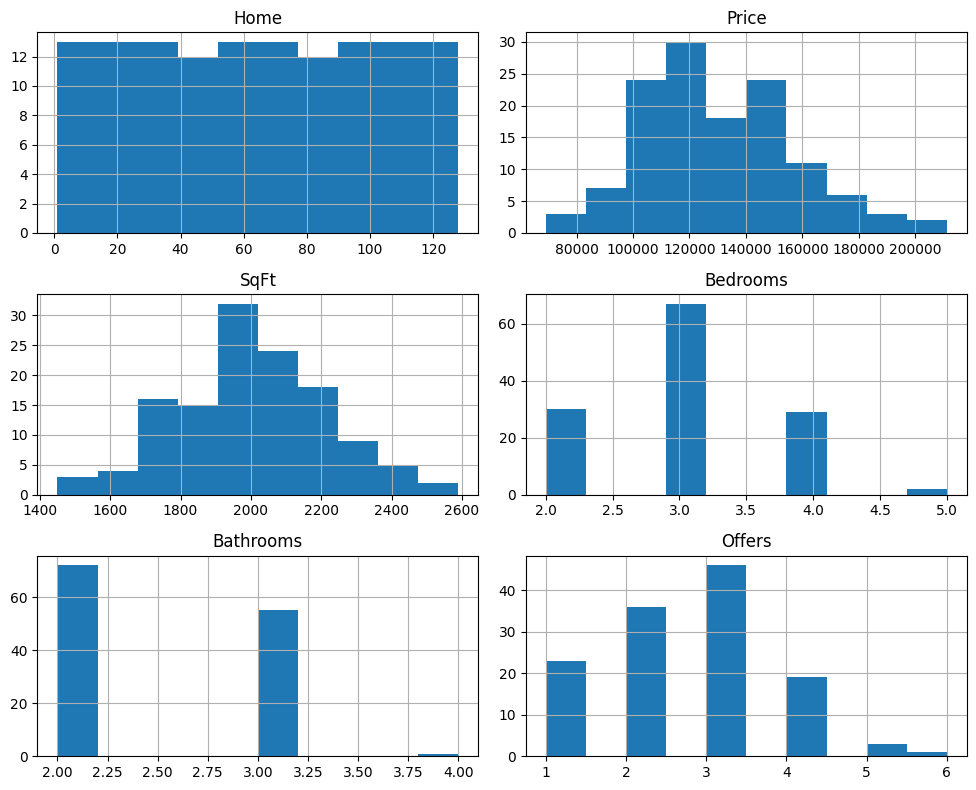

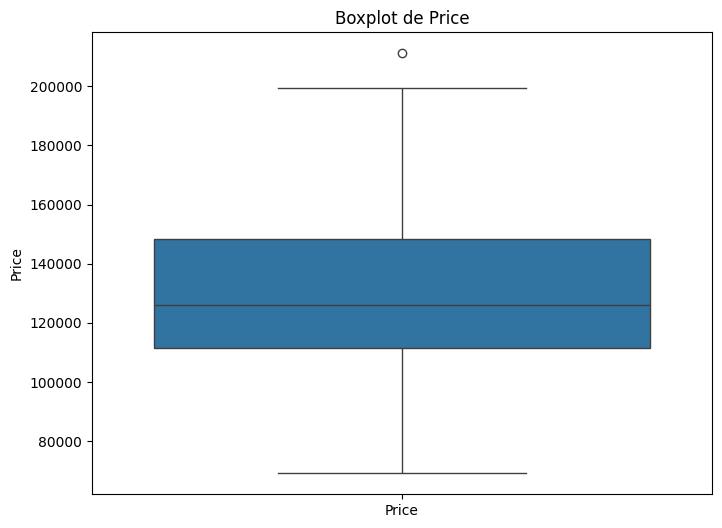

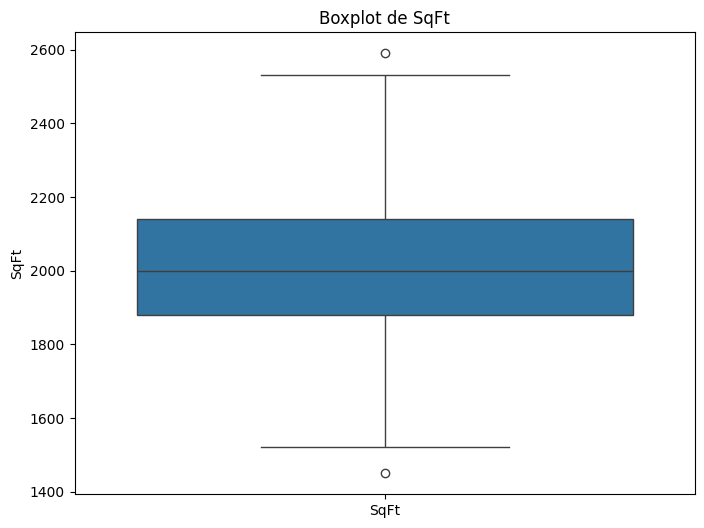

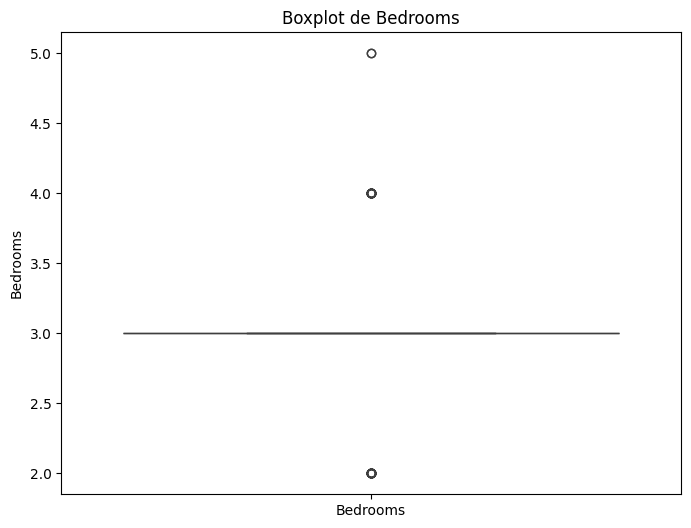

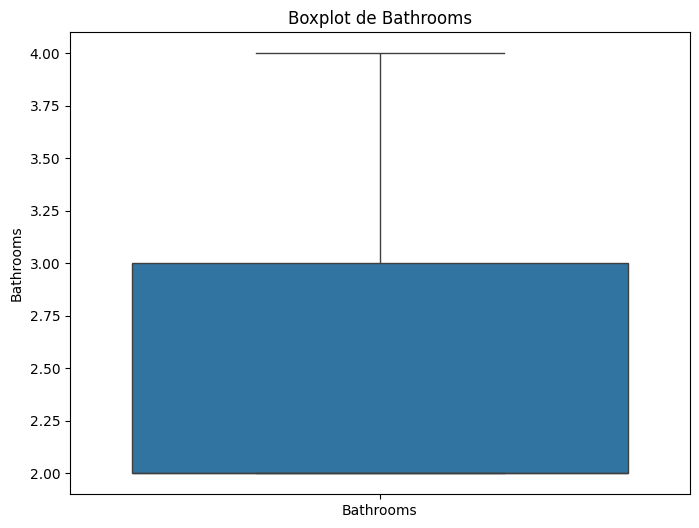

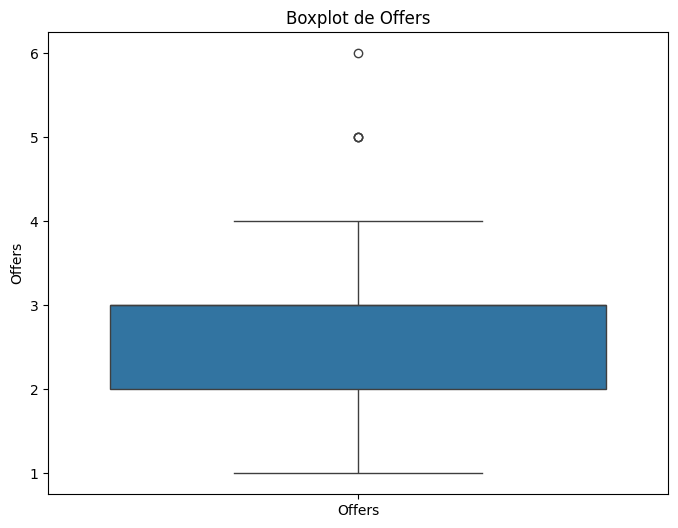

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para cada variable numérica
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Variables numéricas para las que quieres boxplots
numerical_columns = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

# Crear un boxplot para cada variable
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[[column]])
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)
    plt.show()

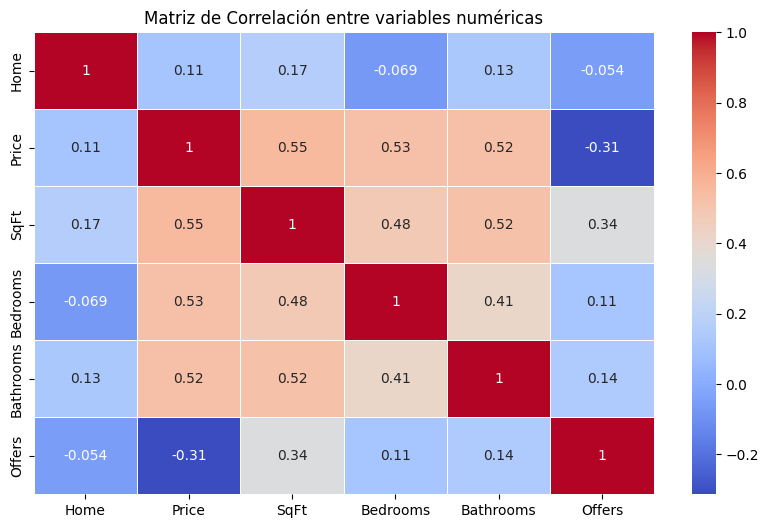

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Calcular la matriz de correlación solo entre las columnas numéricas
correlation_matrix = df[numeric_columns].corr()

# Mostrar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre variables numéricas')
plt.show()

In [ ]:
# Listado de Correlación

print("Características más correlacionadas con la variable objetivo (precio)")
numerical_df = df.select_dtypes(include=['number'])
correlation = numerical_df.corr()
display(correlation["Price"].sort_values(ascending=False)[1:10])

Características más correlacionadas con la variable objetivo (precio)


,Price
SqFt,0.552982
Bedrooms,0.525926
Bathrooms,0.523258
Home,0.108190
Offers,-0.313636


Brick
No     86
Yes    42
Name: count, dtype: int64
Neighborhood
East     45
North    44
West     39
Name: count, dtype: int64


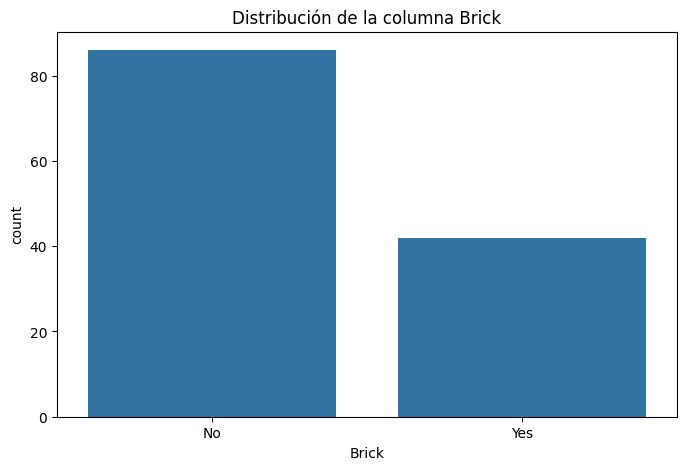

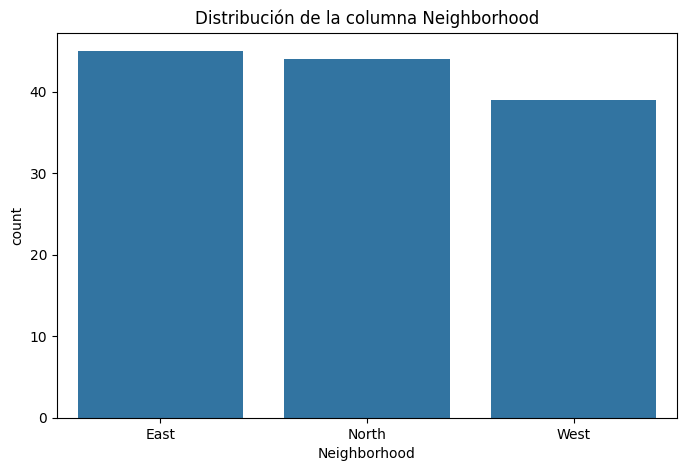

In [ ]:
# Conteo de valores para variables categóricas
print(df['Brick'].value_counts())
print(df['Neighborhood'].value_counts())

# Gráficos de barras para visualización
plt.figure(figsize=(8, 5))
sns.countplot(x='Brick', data=df)
plt.title('Distribución de la columna Brick')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Neighborhood', data=df)
plt.title('Distribución de la columna Neighborhood')
plt.show()

In [ ]:
import pandas as pd

# Supongamos que ya tienes un DataFrame llamado `df`
# Variables numéricas para calcular los outliers
numerical_columns = ['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

# Diccionario para guardar los resultados de los outliers
outlier_counts = {}

# Iterar sobre cada columna
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # Primer cuartil (Q1)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (Q3)
    IQR = Q3 - Q1                   # Rango intercuartílico (IQR)
    lower_bound = Q1 - 1.5 * IQR    # Límite inferior
    upper_bound = Q3 + 1.5 * IQR    # Límite superior

    # Filtrar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = outliers.shape[0]  # Contar outliers

# Mostrar los resultados
for column, count in outlier_counts.items():
    print(f"Número de outliers en la columna '{column}': {count}")

Número de outliers en la columna 'Price': 1
Número de outliers en la columna 'SqFt': 2
Número de outliers en la columna 'Bedrooms': 61
Número de outliers en la columna 'Bathrooms': 0
Número de outliers en la columna 'Offers': 4


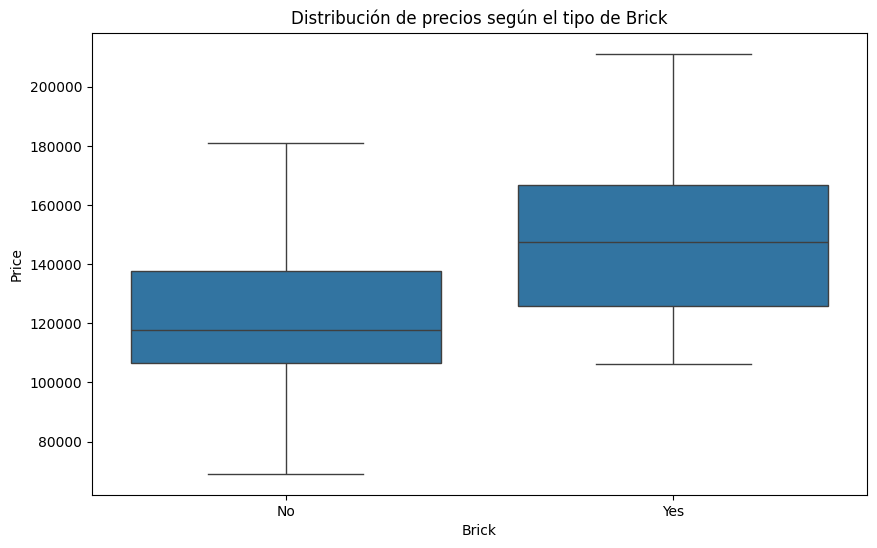

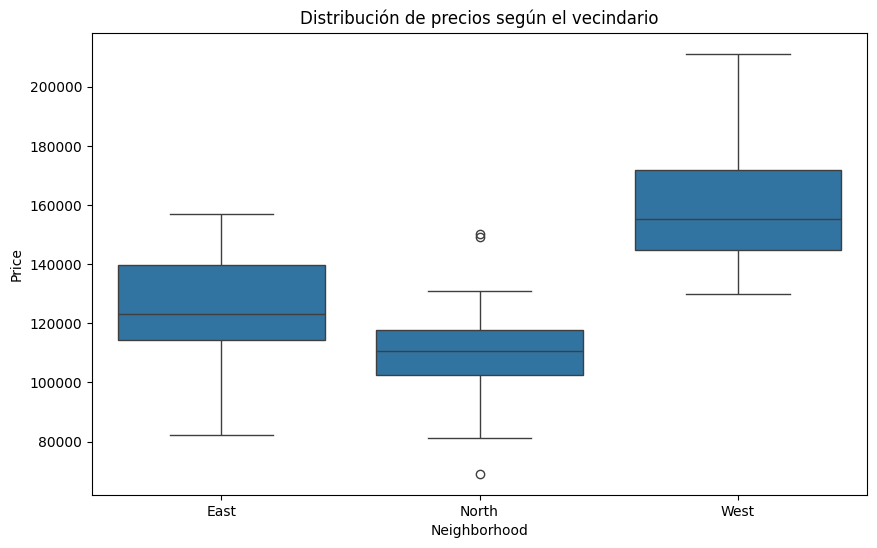

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brick', y='Price', data=df)
plt.title('Distribución de precios según el tipo de Brick')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='Price', data=df)
plt.title('Distribución de precios según el vecindario')
plt.show()

In [ ]:
# 3. División conjunto de datos

X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

In [ ]:
# División de la data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (102, 3)
Tamaño del conjunto de prueba: (26, 3)


In [ ]:
# 4. Escalando variables

from sklearn.preprocessing import StandardScaler

# Escalar X (ya debería estar funcionando correctamente)
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# Escalar y
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

print(y_train_scaled)

[[ 1.31445331e+00]
 [-3.45388093e-01]
 [-1.47875998e+00]
 [-6.01310777e-01]
 [-1.02906726e+00]
 [-9.19386113e-01]
 [ 7.00238873e-01]
 [ 9.37881365e-01]
 [ 7.73359640e-01]
 [-5.79374547e-01]
 [-1.20455710e+00]
 [ 5.50341301e-01]
 [ 1.67274507e+00]
 [-1.42757544e+00]
 [ 1.30714124e+00]
 [-7.18304004e-01]
 [ 7.95295870e-01]
 [ 1.87382718e+00]
 [ 1.11702724e+00]
 [-9.19386113e-01]
 [-9.77882726e-01]
 [ 3.23666924e-01]
 [-1.66242214e-01]
 [ 6.78302643e-01]
 [-1.03272330e+00]
 [-2.25384011e+00]
 [-1.44305984e-01]
 [-5.20877933e-01]
 [ 1.93554971e-03]
 [-5.90342662e-01]
 [-1.35811071e+00]
 [-1.84522406e-01]
 [-8.24329116e-01]
 [-8.49921384e-01]
 [-4.98941703e-01]
 [ 5.97869800e-01]
 [ 5.13780918e-01]
 [-4.73349435e-01]
 [ 2.10415760e+00]
 [ 7.29487180e-01]
 [ 8.50136445e-01]
 [-3.46248337e-02]
 [-2.61299211e-01]
 [-5.02597742e-01]
 [-4.22164898e-01]
 [-1.62586176e-01]
 [ 9.63473634e-01]
 [-1.31789429e+00]
 [-1.72371455e+00]
 [ 2.02157414e-02]
 [-8.57233461e-01]
 [-1.00713103e+00]
 [ 7.6239152

In [ ]:
# 5. Entrenamiento del modelo

# Entrenamiento

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
# Predicciones del modelo

y_pred_scaled = model.predict(X_test_scaled)


Métricas de evaluación (Modelo Lineal):
Error Cuadrático Medio (MSE): 0.43
Coeficiente de Determinación (R^2): 0.46


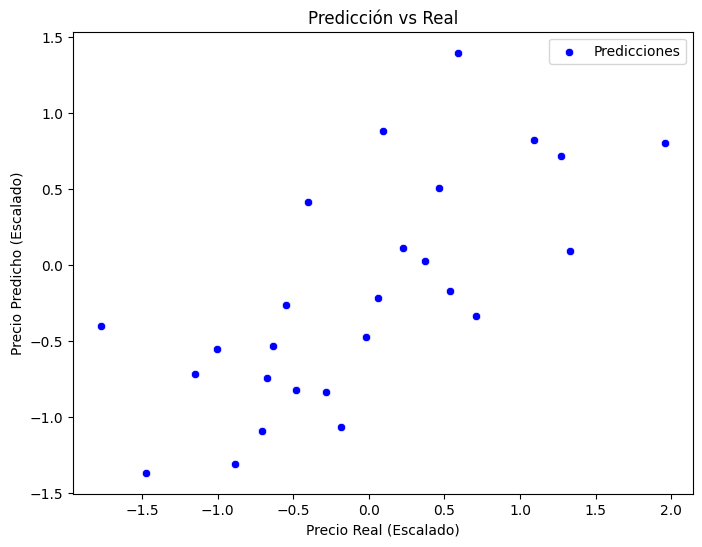

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular métricas
mse_li = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_li = r2_score(y_test_scaled, y_pred_scaled)
print("\nMétricas de evaluación (Modelo Lineal):")
print(f"Error Cuadrático Medio (MSE): {mse_li:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2_li:.2f}")

# Aplanar los arreglos
y_test_flat = y_test_scaled.ravel()
y_pred_flat = y_pred_scaled.ravel()

# Visualizar la predicción frente a los valores reales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='blue', label='Predicciones')
plt.title('Predicción vs Real')
plt.xlabel('Precio Real (Escalado)')
plt.ylabel('Precio Predicho (Escalado)')
plt.legend()
plt.show()

In [ ]:
# Crear un DataFrame con las características de la casa

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Características de la nueva casa
nueva_casa = pd.DataFrame({
    'SqFt': [2000],       # Tamaño de la casa en pies cuadrados
    'Bedrooms': [3],      # Número de habitaciones
    'Bathrooms': [2],     # Número de baños
})

# Escalar las características de la nueva casa usando el escalador de X
nueva_casa_scaled = scaler_x.transform(nueva_casa)

# Predicción del modelo en escala
precio_predicho_scaled = model.predict(nueva_casa_scaled)

# Revertir la escala para obtener el precio original
precio_predicho = scaler_y.inverse_transform(precio_predicho_scaled)

# Mostrar el precio predicho
print(f"El precio predicho para la casa es: ${float(precio_predicho[0][0]):,.2f}")


El precio predicho para la casa es: $123,537.00
